# Relatório de vendas de videogames

Este relatório apresenta algumas informações extraídas de um dataset com as [vendas e avaliações de videogames com mais de 100000 unidades vendidas](https://www.kaggle.com/gregorut/videogamesales), disponível no [Kaggle](https://www.kaggle.com/), extraído de [VGChartz](https://vgchartz.com) e [Metacritic](https://metacritic.com).

As bibliotecas utilizadas são as seguintes:

In [1]:
%matplotlib inline
import pandas as pd
pd.options.mode.chained_assignment = None
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

## Carregar o dataset

In [2]:
df = pd.read_csv("vgsalesreviews.csv")
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.54,76.0,51.0,8.0,324.0,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.80,3.79,3.29,35.57,82.0,73.0,8.3,712.0,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.95,3.28,2.95,32.78,80.0,73.0,8.0,193.0,E
4,Pokemon Red/Pokemon Blue,G,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17411,Nancy Drew: The Deadly Secret of Olde World Park,DS,2007.0,Adventure,Majesco Entertainment,0.00,0.00,0.00,0.00,0.01,64.0,7.0,NaN,NaN,E
17412,Fashion Designer: Style Icon,DS,2007.0,Simulation,505 Games,0.00,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17413,Ashita no Joe 2: The Anime Super Remix,PS2,2002.0,Fighting,Capcom,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN
17414,NadePro!! Kisama no Seiyuu Yatte Miro!,PS2,2009.0,Adventure,GungHo,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN


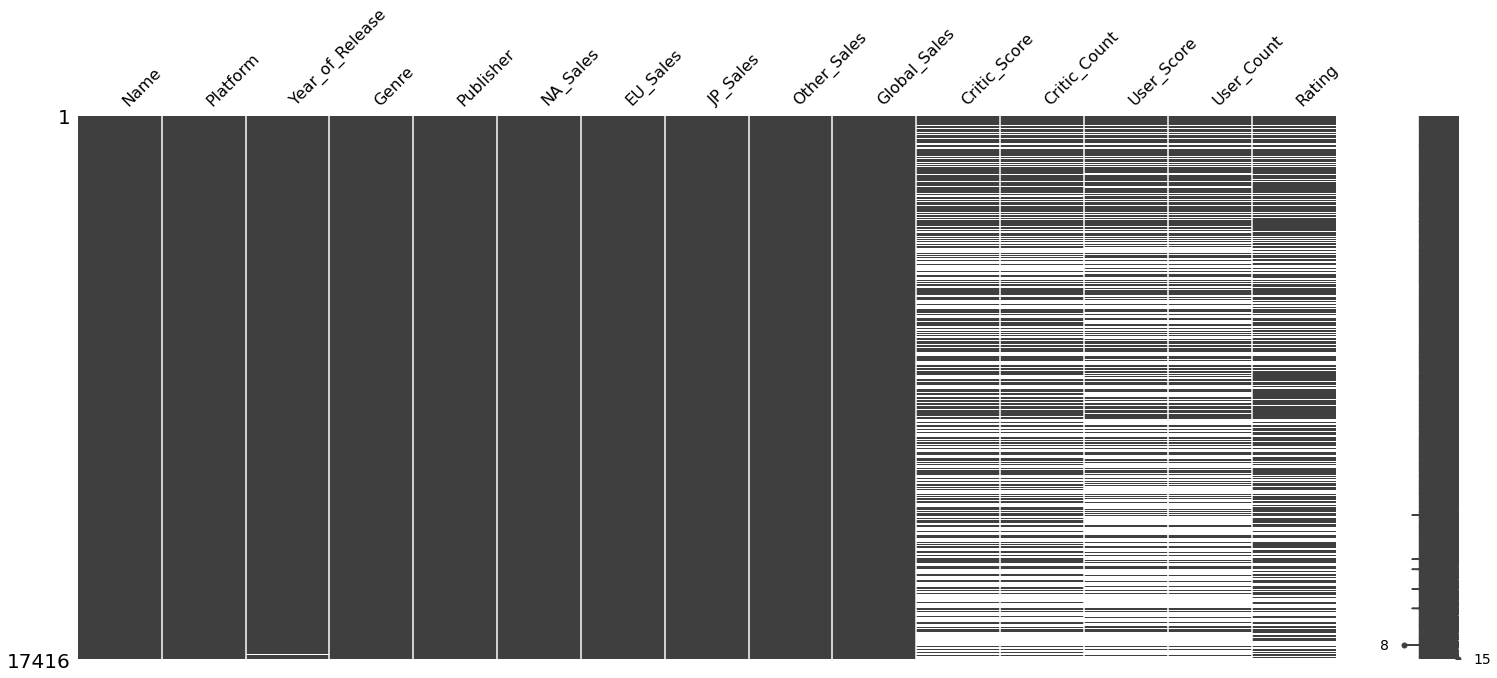

In [3]:
msno.matrix(df) #checando por missing data

O dataset _Video Game Sales_ contém 17416 elementos com 15 atributos cada, além de possuir dados faltantes, como é possível visualizar acima.

Os atributos são:
 - `Name`: nome do jogo
 - `Platform`: plataforma (console ou portátil) em que o jogo foi originalmente lançado
 - `Year_of_Release`: ano de lançamento do jogo
 - `Genre`: gênero do jogo (ex. Platform, Sports, Role-Playing...)
 - `Publisher`: publicadora do jogo (ex. Nintendo, Activion, Konami, Capcom...)
 - `NA_Sales`, `EU_Sales`, `JP_Sales`, `Other Sales`: total de vendas do jogo nas regiões América do Norte, Europa, Japão ou nenhuma dessas, respectivamente.
 - `Global_Sales`: total de vendas do jogo globalmente
 - `Critic_Score`, `Critic_Count`: média e quantidade de avaliações da crítica especializada, variando de 0 a 10.
 - `User_Score`, `User_Count`: média e quantidade de avaliações de usuários, variando de 0 a 100.
 - `Rating`: classificação indicativa.

## Limpeza

Apenas eliminar os elementos com dados faltantes provocaria em perda de informção relevante quando a análise de vendas, então o dataset é dividido entre um para vendas onde pouca informaçãos é perdida e outro para análises de avaliações onde mais informação se perde.

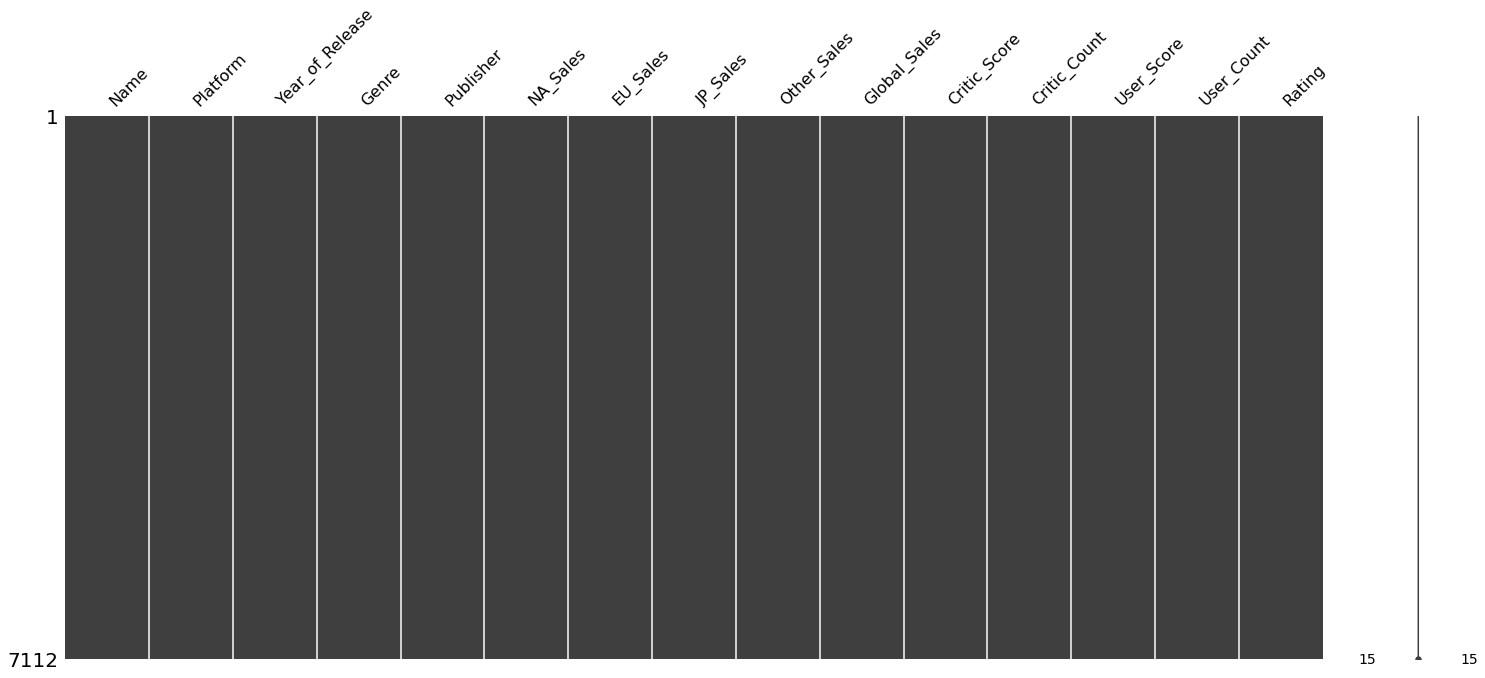

In [4]:
df_r = df.dropna()
df_r.Year_of_Release = df_r['Year_of_Release'].astype(int)
msno.matrix(df_r)

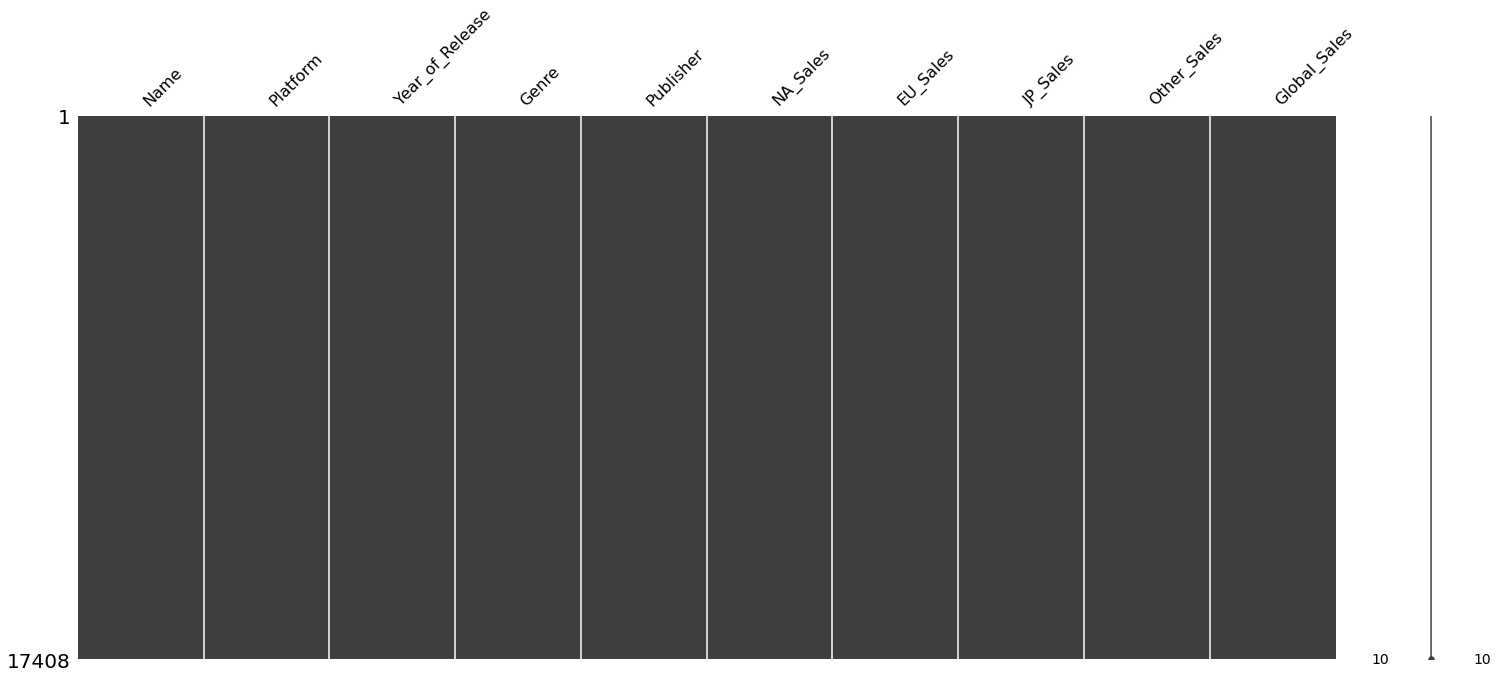

In [5]:
df = df.iloc[:, :-5]
df = df.dropna()
df.Year_of_Release = df['Year_of_Release'].astype(int)
msno.matrix(df)

## Análises

Com o dataset carregado e pré-processado, podemos começar as análises. Todas as análises consideram apenas o período de tempo que o dataset cobre, indo até os primeiros meses de 2017. 

### Os 10 jogos mais vendidos

Primeiramente, a análise mais perceptível a se fazer é quais foram os jogos mais vendidos, como demonstra o gráfico abaixo, que soma o total de unidades vendidas de cada jogo, incluindo a soma de várias plataformas pra um mesmo jogo (ex. GTA 5 pra PC, PS4, PS4, Xbox One, etc). É importante mencionar que Wii Sports, o jogo mais vendido, vinha junto com o console Nintendo Wii e Super Mario Bros. com o NES, então o GTA V tem grande mérito por estar em segundo lugar. 

Text(0, 0.5, 'Jogos')

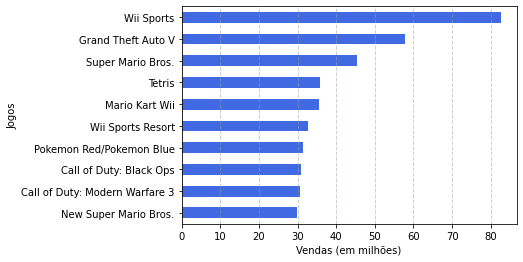

In [22]:
df.groupby('Name')['Global_Sales'].sum().sort_values(ascending=False)[:10][::-1].plot.barh(color='royalblue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='x', alpha=0.5)
plt.xlabel('Vendas (em milhões)')
plt.ylabel('Jogos')

### As 10 publicadores que venderam mais software

Também é relevante analisar quais as publicadores que mais vendem, como mostra o gráfico abaixo. É fácil ver como a Nintendo, mesmo lançando seus jogos exclusivamente para suas plataformas, é a que vende mais e com certa folga. As gigantes EA e Activision lançam jogos multiplataformas e estão logo em seguida nas vendas.  

Text(0, 0.5, 'Publicadora')

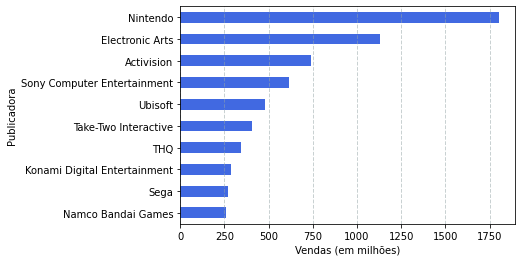

In [21]:
df.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False)[:10][::-1].plot.barh(color='royalblue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='x', alpha=0.5)
plt.xlabel('Vendas (em milhões)')
plt.ylabel('Publicadora')

### Contagem de gêneros

O gráfico mostra que gêneros de jogos a indústria priorizou em produzir nesse período, com grande destaque para o gênero de ação.

Text(0, 0.5, 'Gênero')

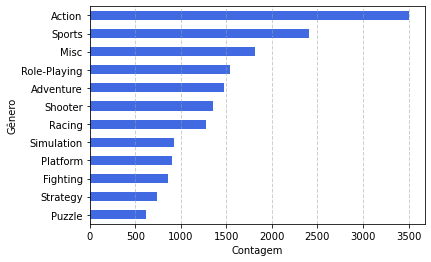

In [8]:
df.Genre.value_counts()[::-1].plot.barh(color='royalblue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='x', alpha=0.5)
plt.xlabel('Contagem')
plt.ylabel('Gênero')

### Relação de vendas por gênero

Com a relação de vendas fica mais evidente observar por quê a indústria prioriza jogos de ação e esportes, sendo shooter uma exceção.

Text(0, 0.5, 'Gênero')

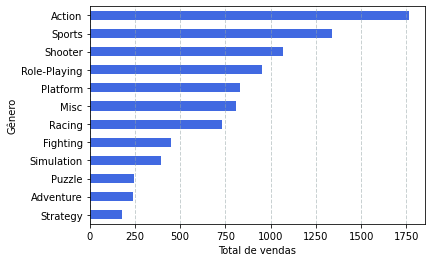

In [9]:
df.groupby(['Genre'])['Global_Sales'].sum().sort_values(ascending=False)[::-1].plot.barh(color='royalblue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='x', alpha=0.5)
plt.xlabel('Total de vendas')
plt.ylabel('Gênero')

### As 10 plataformas com mais jogos

É importante observar como o Nintendo DS e o PS2, as plataformas mais vendidas da história [com mais de 150 milhões de unidades vendidas](https://pt.wikipedia.org/wiki/Lista_de_consoles_de_jogos_eletr%C3%B4nicos_mais_vendidos), receberam muito software também. 

Text(0, 0.5, 'Plataforma')

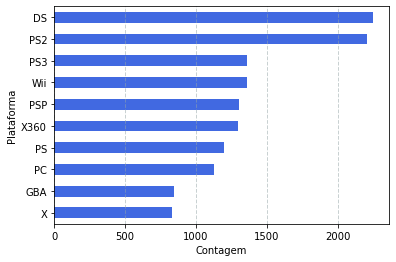

In [10]:
df.Platform.value_counts()[:10][::-1].plot.barh(color='royalblue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='x', alpha=0.5)
plt.xlabel('Contagem')
plt.ylabel('Plataforma')

### As 10 plataformas com mais vendas de jogos

O gráfico mostra como as vendas de software no PS2 acompanharam o próprio console e a quantidade de jogos produzidos, enquanto que no DS nem tanto. Um destaque importante é o Xbox 360 ter ficado em segundo lugar mesmo com quase a metade de jogos produzidos.

Text(0, 0.5, 'Plataforma')

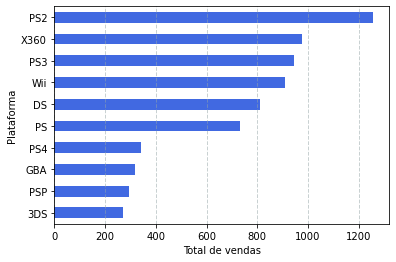

In [11]:
df.groupby(['Platform'])['Global_Sales'].sum().sort_values(ascending=False)[:10][::-1].plot.barh(color='royalblue')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='x', alpha=0.5)
plt.xlabel('Total de vendas')
plt.ylabel('Plataforma')

### Relação entre venda de jogos e avaliações

Essa análise tenta verificar se existe a possibilidade de alguma relação entre boa avaliação da crítica e ou de usuários e quantidade de vendas entre os jogos. Para isso, é utilizada uma relação da média móvel entre a nota de avaliação e a quantidade de vendas.

#### Crítica especializada

Entre a crítica, o gráfico mostra que pode existir uma certa tendência em que jogos com melhor avaliação tenham mais vendas.

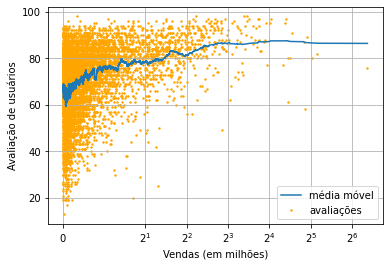

In [15]:
x = df_r[['Global_Sales']][::-1]
y = df_r[['Critic_Score']][::-1]

y_avg = y.rolling(window=100).mean()
data = plt.scatter(x,y,s=2,c='orange', label='avaliações')
plt.plot(x, y_avg, label='média móvel')
plt.xscale('symlog', basex=2)
plt.xlabel('Vendas (em milhões)')
plt.ylabel('Avaliação de usuários')
plt.legend()
plt.grid()
plt.show()

#### Usuários

Entretanto, a mesma tendência não se confirma tão fácil com os usuários, como o gráfico mostra. Um dos possíveis motivos é que não é incomum que exista uma discrepância entre a avaliação da crítica e dos usuários em jogos, [que podem ter diferenças grandes até mesmo por polêmicas envolvidas no jogo](https://www.theguardian.com/games/2019/mar/25/review-bombing-zero-star-reviews).

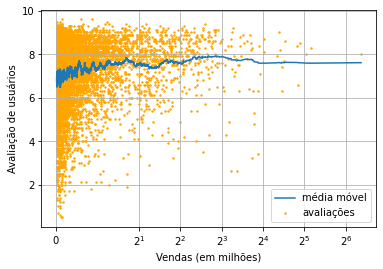

In [17]:
x = df_r[['Global_Sales']][::-1]
y = df_r[['User_Score']][::-1]

y_avg = y.rolling(window=100).mean()
data = plt.scatter(x,y,s=2,c='orange', label='avaliações')
plt.plot(x, y_avg, label='média móvel')
plt.xscale('symlog', basex=2)
plt.xlabel('Vendas (em milhões)')
plt.ylabel('Avaliação de usuários')
plt.legend()
plt.grid()
plt.show()

### Gêneros favoritos em avaliação

Outra análise a ser feita é que gêneros são, em média, melhor avaliados pela crítica e pelos usuários. Os gráficos abaixo mostram que existe uma certa divergência na preferência da crítica e dos jogadores, com destaque para jogos de esporte que são preferidos pela crítica e jogos de plataforma que são preferidos pelos jogadores.

#### Crítica

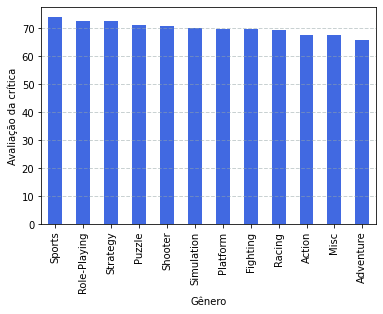

In [40]:
df_r.groupby(['Genre'])['Critic_Score'].mean().sort_values(ascending=False).plot.bar(color='royalblue')
plt.ylabel('Avaliação da crítica')
plt.xlabel('Gênero')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.show()

#### Usuários

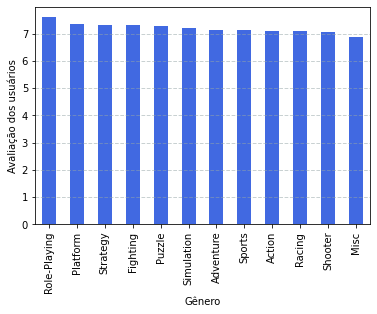

In [49]:
df_r.groupby(['Genre'])['User_Score'].mean().sort_values(ascending=False).plot.bar(color='royalblue')
plt.ylabel('Avaliação dos usuários')
plt.xlabel('Gênero')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.show()

### As 10 publicadoras favoritas em avaliação

Também é interessante observar a diferença na preferência de avaliação da crítica e dos usuários nas publicadores, onde existe uma grande diferença nas colocações das publicadoras com melhor avaliação de cada.

#### Crítica

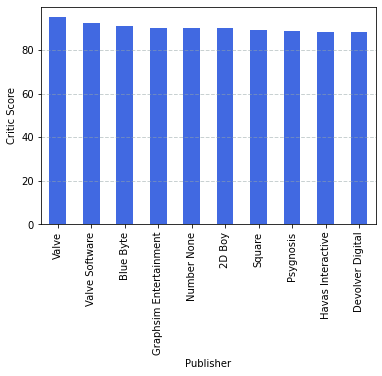

In [54]:
df_r.groupby(['Publisher'])['Critic_Score'].mean().sort_values(ascending=False)[:10].plot.bar(color='royalblue')
plt.ylabel('Critic Score')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.show()

#### Usuários

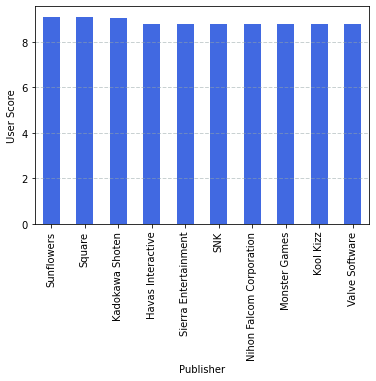

In [55]:
df_r.groupby(['Publisher'])['User_Score'].mean().sort_values(ascending=False)[:10].plot.bar(color='royalblue')
plt.ylabel('User Score')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.5)
plt.show()

### Tendência da popularidade

Por fim, será analisada a tendência de popularidade dos videogames e seus gêneros nos últimos 20 anos, tendo como base a mediana de vendas por ano e utilizando uma regressão linear para traçar a linha de tendência.

#### Videogames em geral

Curiosamente, o gráfico mostra que existe uma tendência de queda na indústria dos games. Um dos possíveis fatores é a ascenção dos smartphones e popularização de jogos de celular.

([<matplotlib.axis.XTick at 0x29c0f1439d0>,
 <a list of 6 Text major ticklabel objects>)

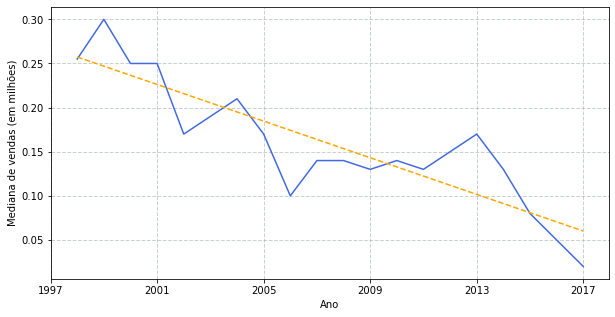

In [61]:
medians = df[df['Year_of_Release'] > 1997].groupby(['Year_of_Release'])['Global_Sales'].median()
fit = np.polyfit(medians.index, medians, 1)
fit_fn = np.poly1d(fit)
medians.plot(color='royalblue', figsize=(10,5))
plt.plot(medians.index, fit_fn(medians.index), color='orange',linestyle='--')
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, alpha=0.5)
plt.xlabel('Ano')
plt.ylabel('Mediana de vendas (em milhões)')
plt.xticks(range(1997,2018,4))

#### Por gênero

É importante observar que a tendência de queda de popularidade não se confirma em todos os gêneros, sendo bem amena no gênero de plataforma. Ao contrário dos demais, o gênero _shooter_ tem uma tendência enorme de aumento de vendas, o que pode indicar um setor frutífero para o mercado.

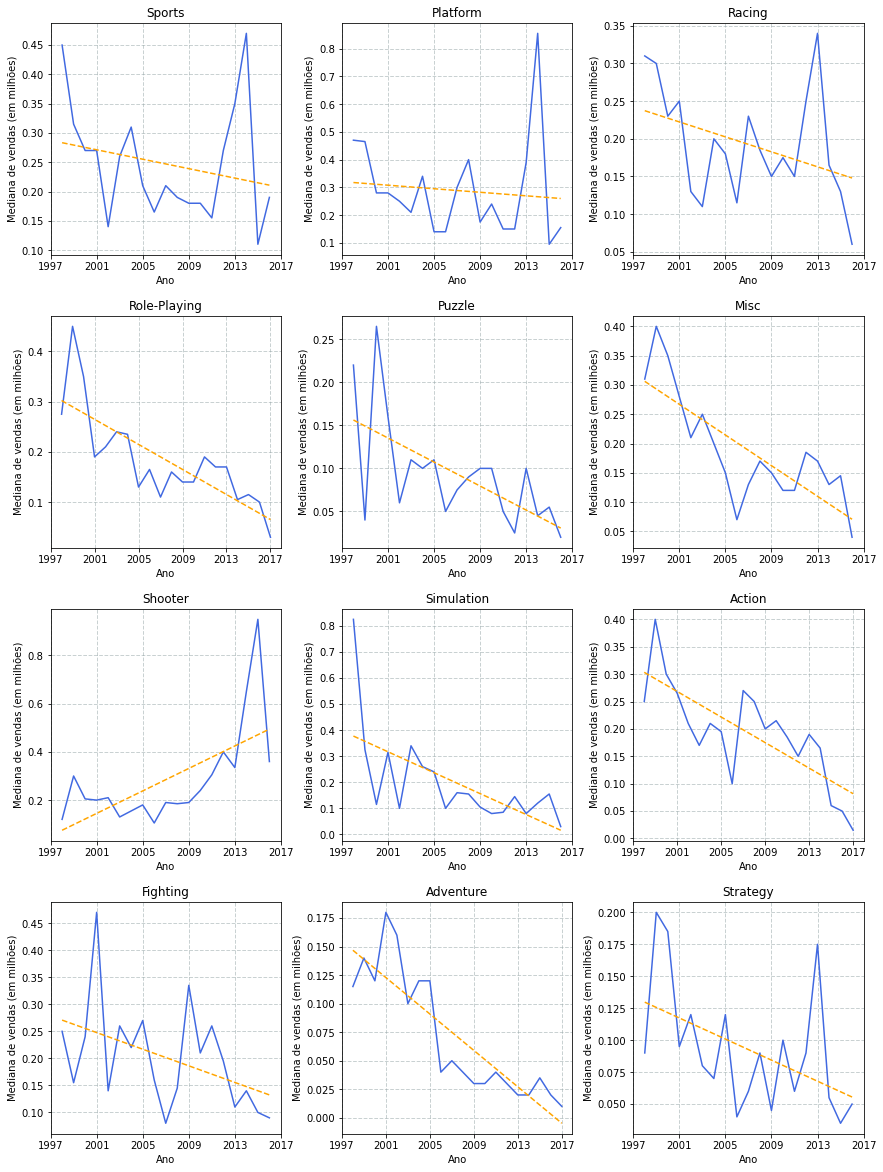

In [62]:
fig, axs = plt.subplots(4, 3, figsize=(12,16))
fig.tight_layout(pad=1.0, w_pad=3.0, h_pad=4.0)
axs = axs.ravel()
genres = df.Genre.unique()
#genres.remove('Misc')
c = df['Year_of_Release'] > 1997

for i, genre in enumerate(genres):
    ax = axs[i]
    medians = df[(df['Genre']==genre) & (c)].groupby(['Year_of_Release'])['Global_Sales'].median()
    fit = np.polyfit(medians.index, medians, 1)
    fit_fn = np.poly1d(fit)
    medians.plot(ax=ax, color='royalblue')
    ax.plot(medians.index, fit_fn(medians.index), color='orange',linestyle='--')
    ax.grid(color='#95a5a6', linestyle='--', linewidth=1, alpha=0.5)
    ax.set_xlabel('Ano')
    ax.set_ylabel('Mediana de vendas (em milhões)')
    ax.set_xticks(range(1997,2018,4))
    ax.set_title(genre)